# This notebook describes the process of generating a new dataset to be rated
but it did not go very well. inputs and outputs need to be more specific but then there are no workflows generated

In [1]:
import matplotlib.pyplot as plt

below bash script is used to process APE wf output 


In [ ]:
#!/bin/bash

# Create the combined directory
mkdir -p combined
counter=1

# Iterate over directories namedafter each length
for length in 3 5 7; do
    total_files=24 # total nr files in dir with the APE numbering problem (actually 20)
    
    for ((i=1; i<=total_files; i++)); do

        # Get the current CWL and PNG file paths
        cwl_file="${length}/CWL/candidate_workflow_${i}.cwl"
        png_file="${length}/Figures/candidate_workflow_${i}.png"

        # Ensure the files exist before moving them
        if [[ -f "$cwl_file" && -f "$png_file" ]]; then
            # Rename and move the CWL file
            mv "$cwl_file" combined/workflow_length${length}_$(printf "%02d" $counter).cwl
            
            # Rename and move the PNG file
            mv "$png_file" combined/workflow_length${length}_$(printf "%02d" $counter).png

            # Increment the counter
            counter=$((counter + 1))
        else
            echo "Warning: Missing file pair for length $length, number $i"
        fi
    done
done


## Genomics

In [ ]:
# Genomics config file 
"""
{
  "ontology_path": "https://raw.githubusercontent.com/Workflomics/domain-annotations/main/edam.owl",
  "ontologyPrefixIRI": "http://edamontology.org/",
  "toolsTaxonomyRoot": "operation_0004",
  "dataDimensionsTaxonomyRoots": ["data_0006", "format_1915"],
  "tool_annotations_path": "https://raw.githubusercontent.com/Workflomics/domain-annotations/main/genomics/bio.tools.json",
  "constraints_path": "https://raw.githubusercontent.com/Workflomics/domain-annotations/main/genomics/constraints.json",
  "strict_tool_annotations": "true",
  "timeout_sec": "1000000",
  "solutions_dir_path": ".",
  "solution_length": {
    "min": 3,
    "max": 3
  },
  "solutions": "1",
  "number_of_execution_scripts": "1",
  "number_of_generated_graphs": "1",
  "number_of_cwl_files": "1",
  "debug_mode": "false",
  "use_workflow_input": "one",
  "use_all_generated_data": "one",
  "tool_seq_repeat": "false",
  "inputs": [
    {
      "data_0006": ["data_0006"],
      "format_1915": ["format_2182"]
    },
    {
      "data_0006": ["data_0006"],
      "format_1915": ["format_2572"]
    }
  ],
  "outputs": [
    {
            "data_0006": [
                "data_0006"
            ],
            "format_1915": [
                "format_1915"
            ]
        }
  ]
}


"""

## Metabolomics 

In [ ]:
# Metabolomics config file 
"""
{
  "ontology_path": "https://raw.githubusercontent.com/Workflomics/domain-annotations/main/edam.owl",
  "ontologyPrefixIRI": "http://edamontology.org/",
  "toolsTaxonomyRoot": "operation_0004",
  "dataDimensionsTaxonomyRoots": ["data_0006", "format_1915"],
  "tool_annotations_path": "https://raw.githubusercontent.com/Workflomics/domain-annotations/main/metabolomics/bio.tools.json",
  "constraints_path": "https://raw.githubusercontent.com/Workflomics/domain-annotations/main/metabolomics/constraints.json",
  "strict_tool_annotations": "true",
  "timeout_sec": "1000",
  "solutions_dir_path": ".",
  "solution_length": {
    "min": 3,
    "max": 3
  },
  "solutions": "20",
  "number_of_execution_scripts": "20",
  "number_of_generated_graphs": "20",
  "number_of_cwl_files": "20",
  "debug_mode": "false",
  "use_workflow_input": "one",
  "use_all_generated_data": "one",
  "tool_seq_repeat": "false",
  "inputs": [
    {
      "data_0006": ["data_0943"],
      "format_1915": ["format_3244"]
    },
    {
      "data_0006": ["data_0006"],
      "format_1915": ["format_3712"]
    }
  ],
  "outputs": [
    {
      "data_0006": ["data_0006"],
      "format_1915": ["format_1915"]
    }
  ]
}


"""

## Proteomics


In [ ]:
# The proteomics config file used for ex length 4 
# run using: java -jar -Xmx10240m APE-2.3.0-executable.jar proteomics/config.json 
"""
{
  "ontology_path": "https://raw.githubusercontent.com/Workflomics/domain-annotations/main/edam.owl",
  "ontologyPrefixIRI": "http://edamontology.org/",
  "toolsTaxonomyRoot": "operation_0004",
  "dataDimensionsTaxonomyRoots": ["data_0006", "format_1915"],
  "tool_annotations_path": "https://raw.githubusercontent.com/Workflomics/domain-annotations/main/proteomics/bio.tools.json",
  "constraints_path": "https://raw.githubusercontent.com/Workflomics/domain-annotations/main/proteomics/constraints.json",
  "strict_tool_annotations": "true",
  "timeout_sec": "1000",
  "solutions_dir_path": ".",
  "solution_length": {
    "min": 4,
    "max": 4
  },
  "solutions": "1",
  "number_of_execution_scripts": "1",
  "number_of_generated_graphs": "0",
  "number_of_cwl_files": "1",
  "debug_mode": "false",
  "use_workflow_input": "one",
  "use_all_generated_data": "one",
  "tool_seq_repeat": "false",
  "inputs": [
    {
      "data_0006": ["data_0943"],
      "format_1915": ["format_3244"]
    },
    {
      "data_0006": ["data_2976"],
      "format_1915": ["format_1929"]
    },
    {
      "data_0006": ["data_0006"],
      "format_1915": ["format_3712"]
    }
  ],
  "outputs": [
    {
      "data_0006": ["data_0006"],
      "format_1915": ["format_1915"]
    }
  ]
}

"""

In [2]:
proteomics_length_time ={1: {"problem_setup":  13.804 , "solving": 0.204 , "solutions": True},
                         2: {"problem_setup": 20.223  , "solving": 0.364, "solutions": True}, 
                         3:{"problem_setup":  22.107  , "solving": 8.167, "solutions": True }, 
                         4:{"problem_setup": 26.875, "solving":  7.123, "solutions": True}, 
                         5:{"problem_setup": 30.994 , "solving": 48.497, "solutions": True}, 
                         6:{"problem_setup": 35.949, "solving": 17.487, "solutions": True}, 
                         7:{"problem_setup":  41.897 , "solving": 116.965, "solutions": True}}

# structure
# length : {"problem_setup": , "solving": , "solutions": }  # time in sec, and for producing one CWL file without any svg file 

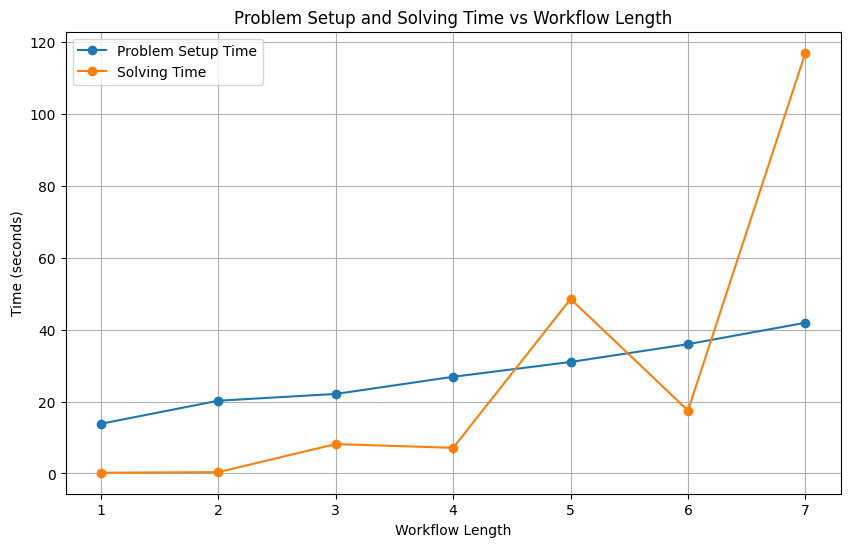

In [3]:
lengths = []
setup_times = []
solving_times = []

for length, times in proteomics_length_time.items():
    if times["problem_setup"] is not None and times["solving"] is not None:
        lengths.append(length)
        setup_times.append(times["problem_setup"])
        solving_times.append(times["solving"])

plt.figure(figsize=(10, 6))
plt.plot(lengths, setup_times, marker='o', linestyle='-', label='Problem Setup Time')
plt.plot(lengths, solving_times, marker='o', linestyle='-', label='Solving Time')

plt.xlabel('Workflow Length')
plt.ylabel('Time (seconds)')
plt.title('Problem Setup and Solving Time vs Workflow Length')
plt.legend()

plt.grid(True)
plt.show()


In [4]:
# To generate the dataset this config was used
"""
{
  "ontology_path": "https://raw.githubusercontent.com/Workflomics/domain-annotations/main/edam.owl",
  "ontologyPrefixIRI": "http://edamontology.org/",
  "toolsTaxonomyRoot": "operation_0004",
  "dataDimensionsTaxonomyRoots": ["data_0006", "format_1915"],
  "tool_annotations_path": "https://raw.githubusercontent.com/Workflomics/domain-annotations/main/proteomics/bio.tools.json",
  "constraints_path": "https://raw.githubusercontent.com/Workflomics/domain-annotations/main/proteomics/constraints.json",
  "strict_tool_annotations": "true",
  "timeout_sec": "10000",
  "solutions_dir_path": ".",
  "solution_length": {
    "min": 3,
    "max": 3
  },
  "solutions": "30",
  "number_of_execution_scripts": "30",
  "number_of_generated_graphs": "30",
  "number_of_cwl_files": "30",
  "debug_mode": "false",
  "use_workflow_input": "one",
  "use_all_generated_data": "one",
  "tool_seq_repeat": "false",
  "inputs": [
    {
      "data_0006": ["data_0943"],
      "format_1915": ["format_3244"]
    },
    {
      "data_0006": ["data_2976"],
      "format_1915": ["format_1929"]
    },
    {
      "data_0006": ["data_0006"],
      "format_1915": ["format_3712"]
    }
  ],
  "outputs": [
    {
      "data_0006": ["data_0006"],
      "format_1915": ["format_1915"]
    }
  ]
}

"""